# WorkFlow
--TO DO
- [x] Load the required libraries
- [x] Import the data
- [x] Plot the Closing Price History
- [x] Plot a Log Return of apple stocks from the closing price
- [x] Plot the distribution of Log Return
- [x] Calculate the probability the stock price drops a certain percantage in a day
- [x] Calculate the Value at Risk
- [x] Calculate the percentiles

Data used is from yahoo.finance

## Step1 Load the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import warnings

%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

If you don't have the data don't worry. Do this;

        pip install pandas-datareader --upgrade
        pip install pandas --upgrade

        import pandas_datareader as web
        apple = web.DataReader('AAPL', 'yahoo', start='2012-01-01', end='2020-12-31')
        apple.head()

Above should sort you out!

To save the downloaded data;

        apple.to_excel('Apple Stock.xlsx', index=False)

## Step2 Importing & Reading the data

In [3]:
apple = pd.read_csv('Apple.csv')
apple.tail(1)

,Date,High,Low,Open,Close,Volume,Adj Close
2264,2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473


**Checking the structural properties of the data**

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2265 non-null   object 
 1   High       2265 non-null   float64
 2   Low        2265 non-null   float64
 3   Open       2265 non-null   float64
 4   Close      2265 non-null   float64
 5   Volume     2265 non-null   float64
 6   Adj Close  2265 non-null   float64
dtypes: float64(6), object(1)
memory usage: 124.0+ KB


As we can see, the Date column is an object data type instead of a datetime data type. Thus we will use a shortcut to do this. Change the data type to datetime64 using the `.astype()` method. I.e

        df[['column']].astype('datetime64')

In [5]:
apple[['Date']] = apple[['Date']].astype('datetime64')

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2265 non-null   datetime64[ns]
 1   High       2265 non-null   float64       
 2   Low        2265 non-null   float64       
 3   Open       2265 non-null   float64       
 4   Close      2265 non-null   float64       
 5   Volume     2265 non-null   float64       
 6   Adj Close  2265 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.0 KB


Now the Date column has the correct data type. In case in the future we encounter problems with our Date column, then we will parse our date column using the pandas datetime functions.

### Summary Stats

In [7]:
apple.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2265.000000,2265.000000,2265.000000,2265.000000,2.265000e+03,2265.000000
mean,39.202724,38.396376,38.797961,38.814736,2.289430e+08,36.955197
std,24.785911,24.077355,24.438527,24.448116,1.798766e+08,24.952141
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.152316
25%,22.905001,22.450001,22.691786,22.670000,1.103956e+08,20.011274
50%,29.982500,29.567499,29.767500,29.817499,1.663484e+08,27.586819
75%,46.917500,46.174999,46.529999,46.529999,2.822932e+08,45.046944
max,138.789993,134.339996,138.050003,136.690002,1.506120e+09,136.050766


## Step3 Plot the closing price history

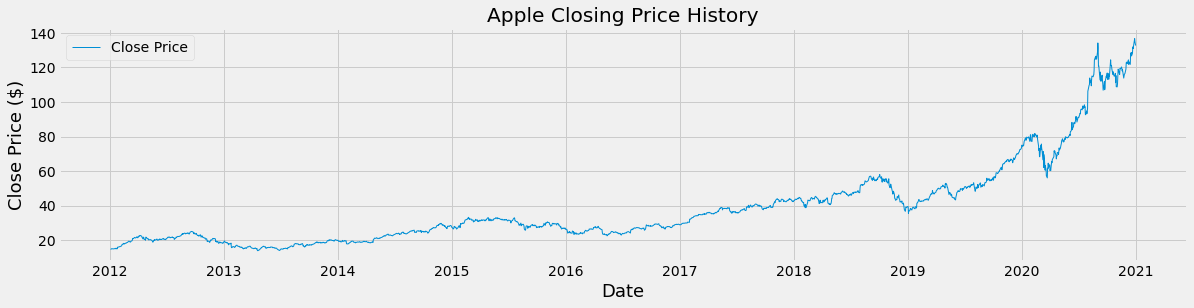

In [8]:
plt.figure(figsize=(18,4))
plt.title('Apple Closing Price History', color='k')
plt.plot(apple['Date'], apple['Close'], label='Close Price', linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.legend()
plt.show()

## Step4 Apple Daily Log Return History

In [9]:
apple['Close1'] = apple['Close'].shift(-1)
apple['LogReturn'] = np.log(apple['Close1']) - np.log(apple['Close'])
apple.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Close1,LogReturn
0,2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315,14.765714,0.005360
1,2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085,14.929643,0.011041
2,2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838,15.085714,0.010400


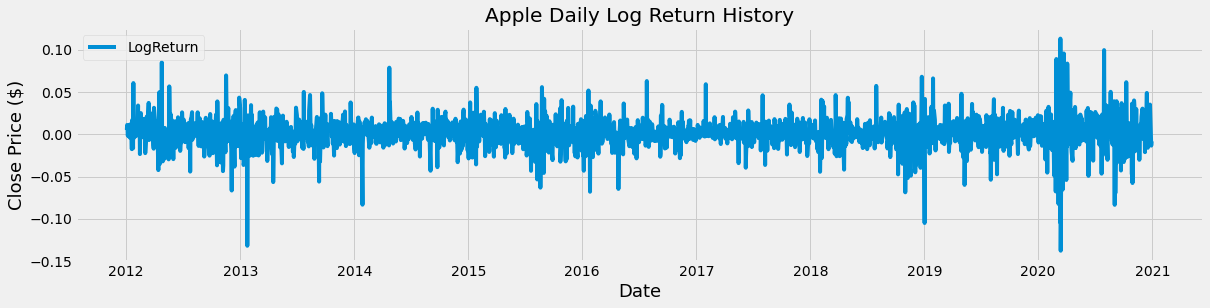

In [10]:
plt.figure(figsize=(18,4))
plt.title('Apple Daily Log Return History', color='k')
plt.plot(apple['Date'], apple['LogReturn'], label='LogReturn')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.legend()
plt.show()

## Step5 Distribution of Log Return

In [11]:
mu=apple['LogReturn'].mean()
sigma = apple['LogReturn'].std(ddof=1)

In [12]:
# Calculating the distribution

density = pd.DataFrame()
density['x'] = np.arange(apple['LogReturn'].min()-0.01, apple['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

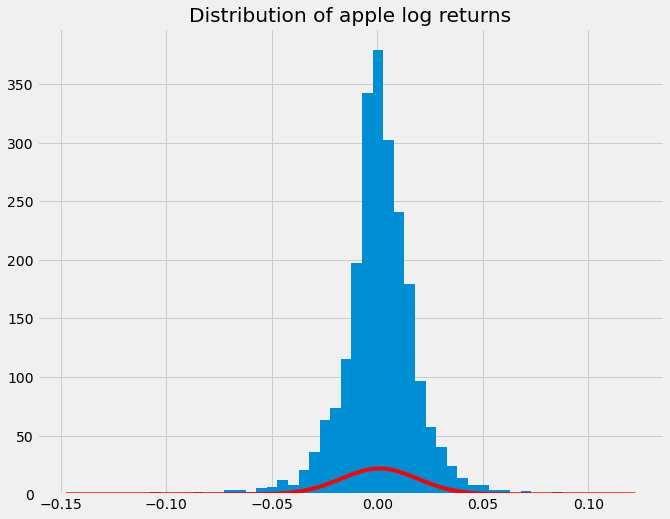

In [13]:
plt.title('Distribution of apple log returns')
apple['LogReturn'].hist(bins=50, figsize=(10, 8))
plt.plot(density['x'], density['pdf'], color='r')
plt.show()

## Step6 The probability that the stock price drops a certain percantage in a day

Lets say the stock wants to drop 5% in a day. Then,

        5% is equivalent to 0.05. Dropping by 5% is equivalent of -0.05
        the probability will be
        
        norm.cdf(-0.05, mu, sigma)

We use norm since our log return is normally distributed

In [14]:
def drop_daily():
    percentage = int(input('Enter a positive integer: '))
    percent = percentage
    print(f'You want to find out if the stock will drop {percentage}% in a day!')
    percentage = (percentage/100) * -1
    drop = norm.cdf(percentage, mu, sigma)
    return f'The probability that the stock price drops {percent}% in a day is, {round(drop, 4)}.'

drop_daily()

Enter a positive integer: 5
You want to find out if the stock will drop 5% in a day!


'The probability that the stock price drops 5% in a day is, 0.0025.'

## Step7 The probability of the stock price dropping over a certain percaentage in a year

There are 220 trading day in a year if we remove all the public holidays and weekends in the USA. It is **<font color='red'>very important that </font>**you confirm with your country so that you know how many **trading days** your country has in a year.

Since Apple is an USA stock, we have 220 trading days in a year in respect to the USA trading calendar

Lets say the stock is dropping over 40% in 220 days. The the new mean and sigma are,

        mu220 = 220*mu
        sigma220 = (220**0.5) * sigma
        40% drop will be -0.4 i.e -1 * (40/100) where -1 is the rep the drop
        the probablity will be
        
        norm.cdf(-0.4, mu220, sigma220))

In [15]:
mu220 = 220*mu
sigma220 = (220**0.5) * sigma

def drop_year():
    percentage = int(input('Enter a positive integer: '))
    percent = percentage
    print(f'You want to find out if the stock will drop {percentage}% in a year!')
    percentage = (percentage/100) * -1
    drop = norm.cdf(percentage, mu220, sigma220)
    return f'The probability that the stock price drops {percent}% in a year is, {round(drop, 4)}.'

drop_year()

Enter a positive integer: 40
You want to find out if the stock will drop 40% in a year!


'The probability that the stock price drops 40% in a year is, 0.0112.'

## Step8 Value at Risk (VaR)

Here we will use the percentage points to calculate the value at risk. The function that will help us do this is `norm.ppf`

The parameters here are:

        probability = 90 or 95 or 99
        mean
        standard deviation or the volatility(sigma)
        

In [16]:
VaR = norm.ppf(0.05, mu, sigma)
print(f'Sinle day 5% VaR is {round(-1*VaR, 4)*100}% with 95% confidence interval.')
print(f'\n We could also say that the Single day VaR at 95% confidence interval is {round(-1*VaR, 4)*100}% (of money invested on the stock).')

Sinle day 5% VaR is 2.88% with 95% confidence interval.

 We could also say that the Single day VaR at 95% confidence interval is 2.88% (of money invested on the stock).


## Step 9 Quartiles

In [17]:
# 5% quartile
print('The 5% quartile ', norm.ppf(0.05, mu, sigma))
# 95% quartile
print('The 95% quartile ', norm.ppf(0.95, mu, sigma))

The 5% quartile  -0.028831181567677982
The 95% quartile  0.030775587434778567


In [18]:
import calendar
import time

time_now = time.ctime()
print(f'The time right now is {time_now} in Nairobi Kenya!')
print('')

c = calendar.TextCalendar(calendar.SUNDAY)
c.prmonth(2021, 9)

The time right now is Tue Sep 21 00:20:48 2021 in Nairobi Kenya!

   September 2021
Su Mo Tu We Th Fr Sa
          1  2  3  4
 5  6  7  8  9 10 11
12 13 14 15 16 17 18
19 20 21 22 23 24 25
26 27 28 29 30


--TO DO

- [x] Conduct time series analysis on the same stock on 1st Oct 2021